# ORTHOGONAL POLYNOMIAL DENSITY ESTIMATION
## Preliminaries
### Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import numpy.polynomial.legendre as npl

from scipy.optimize import minimize

### Notebook settings

In [2]:
%matplotlib notebook
sbn.set_style('white')

legend_params = {'loc': 'best',
                 'frameon': True, 
                 'fancybox': True, 
                 'framealpha': 0.7}

## Create Synthetic Data
Data are projected into the [-0.9, 0-9] interval.

<IPython.core.display.Javascript object>


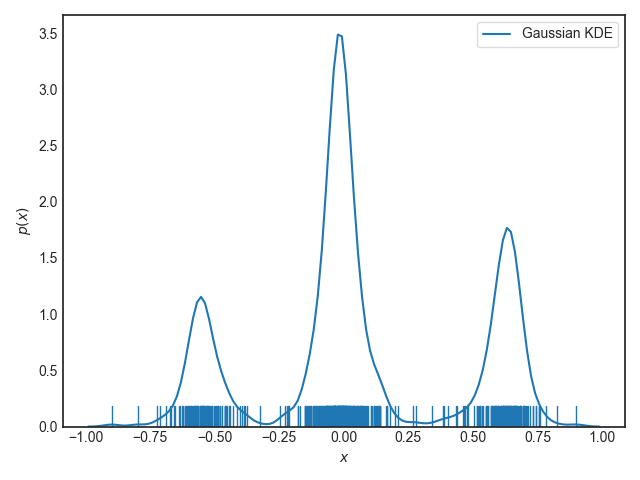

In [13]:
N = 400

#x = np.random.uniform(low=-10.0, high=10.0, size=N)
x1 = np.random.laplace(loc=-5, size=N)
x2 = np.random.laplace(loc=7, size=int(N/2))
x3 = np.random.laplace(loc=-15, size=int(N/3))
x = np.append(np.append(x1, x2), x3)

x -= 0.5*(x.min() + x.max())
x /= (x.max() - x.min())
x *= 1.8

#x = np.zeros(N)

fig, ax = plt.subplots()
sbn.distplot(x, hist=False, rug=True, kde_kws={'bw': 0.03}, label='Gaussian KDE', ax=ax)
ax.set(xlabel=r'$x$', ylabel=r'$p(x)$')
ax.legend(**legend_params)
fig.tight_layout()

## Maximum Likelihood Estimate of the Density
### Initialize Legendre polynomials
Choose polynomial degree $J$, initialize coefficients $\mathbf{c}$, and compute basis-function values at all values of $x$.

In [23]:
J = 109

norm = np.array([np.sqrt(2/(2*j + 1)) for j in range(J+1)])
phi_jn = npl.legvander(x, J).T / norm[:, np.newaxis]

c = phi_jn.sum(axis=1)/N

### Plot comparative results
The estimated density is evaluated on a uniform grid.

<IPython.core.display.Javascript object>


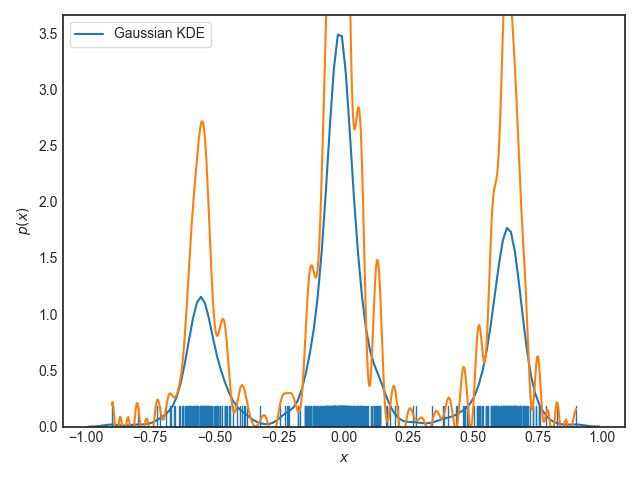

In [25]:
x_grid = np.linspace(-0.9, 0.9, 500)
phi_jn_grid = npl.legvander(x_grid, J).T / norm[:, np.newaxis]

fig, ax = plt.subplots()
sbn.distplot(x, hist=False, rug=True, kde_kws={'bw': 0.03}, label='Gaussian KDE', ax=ax)
ax.plot(x_grid, c.dot(phi_jn_grid))
ax.set(xlabel=r'$x$', ylabel=r'$p(x)$')
ax.legend(**legend_params)
fig.tight_layout()

## Density Gradient

<IPython.core.display.Javascript object>


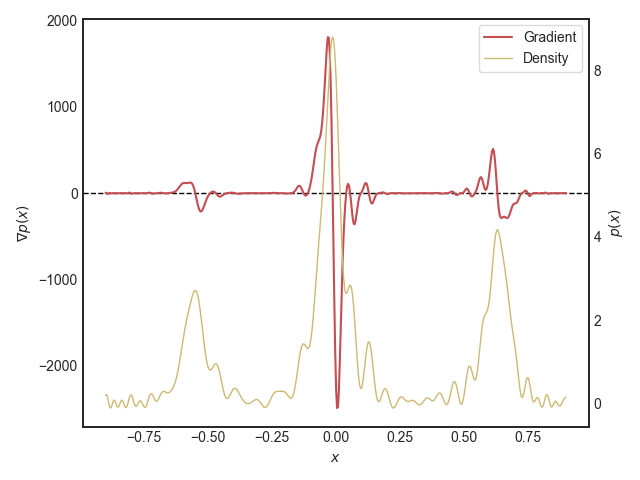

In [26]:
coeffs_of_gradient = npl.legder(c/norm)
gradient = 2*npl.legval(x_grid, c/norm)*npl.legval(x_grid, coeffs_of_gradient)

fig, grad_ax = plt.subplots()
grad_ax.axhline(color ='k', linewidth=1.0, linestyle='--')
grad_ax.plot(x_grid, gradient, color='#c44e52', label='Gradient')
grad_ax.set(xlabel=r'$x$', ylabel=r'$\nabla p(x)$')
dens_ax = grad_ax.twinx()
dens_ax.plot(x_grid, c.dot(phi_jn_grid), color='#ccb974', linewidth=1.0, label='Density')
dens_ax.set_ylabel(r'$p(x)$')

grad_line, grad_label = grad_ax.get_legend_handles_labels()
dens_line, dens_label = dens_ax.get_legend_handles_labels()
dens_ax.legend(grad_line+dens_line, grad_label+dens_label, **legend_params)

fig.tight_layout()